In [1]:
import re
import os
import math
# import time
from string import punctuation, whitespace
from stemming.porter2 import stem
from collections import Counter
from typing import List, Tuple

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# HP7 additional punctation
punctuation += '““…—’”'

In [2]:
import os
from time import time

os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "python3"

from pyspark import SparkContext, SparkConf


In [10]:
# settings
# book_name = 'harry_potter_7.txt'
book_name_pl = 'pan_tadeusz.txt'
# book_name = 'witcher_the_last_wish.txt'
book_name = 'witcher_blood_of_elves.txt'

stop_words_file = 'stop_words.txt'
stop_words_file_pl = 'stop_words_pl.txt'

results_template = 'result{}.txt'
results_dir_name = 'witcher'

base_path = os.path.dirname(os.path.abspath(__name__))
result_file_path_template = os.path.join(base_path, results_dir_name, results_template)

if results_dir_name and not os.path.exists(results_dir_name):
    os.mkdir(results_dir_name)

def make_results_utils():
    results = set()
    
    def create_result_file(template_str, lines):
        file_path = result_file_path_template.format(template_str)
    
        with open(file_path, 'w') as f:
            if type(lines) == str:
                f.write(lines)
            else:
                f.write('\n'.join(lines))
        results.add(file_path)
    
    def remove_results():
        for result in results:
            os.remove(result)
        results.clear()
        
    return create_result_file, remove_results

create_result_file, remove_results = make_results_utils()


In [11]:
# read stop words
with open(stop_words_file, 'r') as f:
    stop_words = {word.lower().translate(str.maketrans('', '', whitespace)) for line in f.readlines() for word in line.split()}

In [12]:
def create_wordcloud(dct):
    wc = WordCloud(background_color="white", max_words=len(dct.items()))
    wc.generate_from_frequencies(dct)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [4]:
import os

os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "python3"

from pyspark import SparkContext, SparkConf

sc = SparkContext("local", "Empty")
sc.stop()

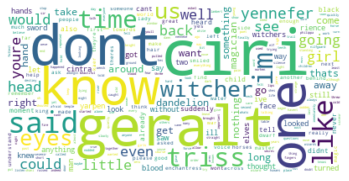

In [15]:
# EX 26
sc = SparkContext("local", "Ex26")

stopwords = set(sc.textFile(stop_words_file).map(lambda w: w.lower()).collect())

words = sc.textFile(book_name)\
    .flatMap(lambda l: l.split())\
    .map(lambda w: w.lower().translate(str.maketrans('', '', punctuation)))\
    .filter(lambda w: w != '' and w not in stopwords)\
    .map(lambda w: (w, 1))\
    .reduceByKey(lambda a, b: a + b)\
    .sortBy(lambda w: w[1], ascending=False)

res = dict(words.collect())
sc.stop()
create_wordcloud(res)


In [114]:
# EX 29
sc.stop()

sc = SparkContext("local", "Ex29")
n = 101

sequence = (i for i in range(n))

result = sc.parallelize(sequence)\
    .map(lambda x: (1, x, x, x, {x}))\
    .reduce(lambda a, b: (a[0] + b[0], (a[0]*a[1] + b[0]*b[1]) / (a[0] + b[0]), min(a[2], b[2]), max(a[3], b[3]), a[4].union(b[4])))
sc.stop()

print(result)

(101, 50.0, 0, 100, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100})


In [112]:
sc.stop()
# Counter([1,1,1,2,3,4,5,5,5,6,6,9]).most_common()[0:2]
# ?Counter.most_common
# ?randint

In [110]:
# EX 35
from random import randint
sc.stop()

sc = SparkContext("local", "Ex35")

stopwords = set(sc.textFile(stop_words_file).map(lambda w: w.lower()).collect())

words = sc.textFile(book_name)\
    .flatMap(lambda l: l.split())\
    .map(lambda w: w.lower().translate(str.maketrans('', '', punctuation)))\
    .filter(lambda w: w != '' and w not in stopwords)\
    .collect()

word_and_next = zip(words, words[1:])

res = sc.parallelize(word_and_next)\
    .groupBy(lambda t: t[0])\
    .mapValues(lambda t: [v for k,v in t])\
    .mapValues(lambda t: Counter(t).most_common()[:5])\
    .mapValues(lambda t: [k for k,v in t])\
    .collect()

sc.stop()

dct = dict(res)

paragraph = []
paragraph_len = 100

word = list(dct.keys())[randint(0, len(dct))]
paragraph.append(first_word)
for _ in range(1, paragraph_len):
    word = dct[word][randint(0, len(dct[word])-1)]
    paragraph.append(word)


print(' '.join(paragraph))

seethed nilfgaard pays gold rare moments sun reborn flowers ciri suddenly appeared air still holding tight semicircle facing going say continued quietly furtively could allow lose know know geralt ciri said quietly people sodden brugge verden still enough tell ill show really happened spring dont understand anything love though idea even wider extinguish give lot spells filters amulets artefacts nothing im listening halfconvinced someone elses expense mustnt give back turned head away wont harm ciri dont understand dont want tell something huge helmet fluttering eyelashes group standing leaning back ached clenched around corner room man make sure may ask something


In [1]:
# a.union({10, 11})

In [7]:

g = [
    [1, [3,4,5]],
    [2, [1,3]],
    [3, [4,5]],
    [4, [1,2]],
    [5, [4,5]]
]


In [27]:
# EX 31

sc.stop()
sc = SparkContext("local", "Ex31")

result = sc.parallelize(g)\
    .flatMap(lambda p: [(x, p[0]) for x in p[1]])\
    .groupByKey()\
    .mapValues(lambda v: list(v))\
    .sortByKey()\
    .collect()

sc.stop()

print(result)

[(1, [2, 4]), (2, [4]), (3, [1, 2]), (4, [1, 3, 5]), (5, [1, 3, 5])]


In [62]:
# -------------------------------------

In [5]:
# EX 36
sc.stop()
sc = SparkContext("local", "Ex36")

OUT = 0
IN = 1

def map_edges_in_out_deg(p):
    in_deg = [x[1] for x in p[1] if x[0] == IN] or [0]
    out_deg = [x[1] for x in p[1] if x[0] == OUT] or [0]
    return (p[0], in_deg[0], out_deg[0])

result = sc.textFile("./web-Stanford.txt")\
    .map(lambda row: row.split())\
    .map(lambda p: (int(p[0]), int(p[1])))\
    .flatMap(lambda p: [((p[0], OUT), 1), ((p[1], IN), 1)] )\
    .reduceByKey(lambda v1, v2: v1 + v2)\
    .map(lambda p: (p[0][0], (p[0][1], p[1])))\
    .groupByKey()\
    .mapValues(lambda v: list(v))\
    .sortByKey()\
    .map(lambda p: map_edges_in_out_deg(p))

avg_in = result.map(lambda p: (p[1], 1))\
    .reduce(lambda v1, v2: ( (v1[0] * v1[1] + v2[0] * v2[1]) / (v1[1] + v2[1]), v1[1] + v2[1] ) )

avg_out = result.map(lambda p: (p[2], 1))\
    .reduce(lambda v1, v2: ( (v1[0] * v1[1] + v2[0] * v2[1]) / (v1[1] + v2[1]), v1[1] + v2[1] ) )

process_result = result.take(5)

sc.stop()

print(f"Avg  inDeg(v): {avg_in[0]}")
print(f"Avg outDeg(v): {avg_out[0]}")
print(process_result)

Avg  inDeg(v): 8.203165627893485
Avg outDeg(v): 8.203165627893197
[(1, 0, 2), (2, 70, 31), (3, 1, 1), (4, 0, 4), (5, 3, 7)]


In [6]:
# EX 37
t0 = time()
sc.stop()
sc = SparkContext("local", "Ex37")

edges_N = sc.textFile("./web-Stanford.txt")\
    .map(lambda row: row.split())\
    .map(lambda p: (int(p[0]), int(p[1])))\
    .map(lambda p: p if p[0] < p[1] else (p[1], p[0]))\
    .distinct()\
    .flatMap(lambda p: [(p[0], p[1]), (p[1], p[0])])\
    .groupByKey()\
    .mapValues(list)\
    .sortByKey()

N_dict = {v: set(N) for (v, N) in edges_N.collect()}
deg_dict = {v: len(N) for (v, N) in edges_N.collect()}
vertices = edges_N.map(lambda p: p[0])


def f(v):
    deg = len(N_dict[v])
    if deg < 2:
        return (v, 0, deg)
    
#     c = sum([1 if j in N_dict[i] else 0 for i in p[1] for j in p[1]]) / (deg * (deg-1))
    triangles = 0
    for i in N_dict[v]:
        for j in N_dict[v]:
            if j in N_dict[i]:
                triangles += 1
    c = triangles / (deg * (deg-1))
    
    return (v, c, deg)


result = vertices.map(f)
res = result.collect()

avg_c = sc.parallelize(res)\
    .map(lambda p: (p[1], 1))\
    .reduce(lambda p1, p2: (p1[0]*p1[1] / (p1[1] + p2[1]) + p2[0]*p2[1] / (p1[1] + p2[1]) , p1[1] + p2[1]))


sc.stop()

t1 = time()
print(t1 - t0)

673.0941767692566


In [92]:
avg_c[0]
# res[:5]

0.5976304608027554

In [85]:
t0 = time()
# r = sc.parallelize(res2).aggregate(
#     ([], (0, 0)), 
#     lambda U, T: ( [*U[0], T], ( (U[1][0]*U[1][1] + T[1])/(U[1][1]+1), U[1][1]+1 ) ),
#     lambda U1, U2: ( [*U1[0], *U2[0]], ( (U1[1][0]*U1[1][1] + U2[1][0]*U2[1][1])/(U1[1][1]+U2[1][1]), U1[1][1]+U2[1][1] ) )
# )
r = sc.parallelize(res2).aggregate(
    (0, 0), 
    lambda U, T: ( (U[0]*U[1] + T[1])/(U[1]+1), U[1]+1 ),
    lambda U1, U2: ( (U1[0]*U1[1] + U2[0]*U2[1])/(U1[1]+U2[1]), U1[1]+U2[1] )
)
t1 = time()
print(t1 - t0)

t0 = time()
r1 = avg_c = sc.parallelize(res2)\
    .map(lambda p: (p[1], 1))\
    .reduce(lambda p1, p2: (p1[0]*p1[1] / (p1[1] + p2[1]) + p2[0]*p2[1] / (p1[1] + p2[1]) , p1[1] + p2[1]))
t1 = time()
print(t1 - t0)

0.47454047203063965
0.561342716217041


In [61]:
# result.map(lambda p: (p[1], 1)).aggregate((0, 0), lambda p1, p2: (p1[0] + p2[0], p1[1] + p2[1]), lambda p1, p2: (p1[0] + p2[0], p1[1] + p2[1]))

In [45]:
result.take(5)

[(1, 0.0, 2),
 (2, 0.0012422360248447205, 70),
 (3, 0.0, 2),
 (4, 0.6666666666666666, 4),
 (5, 0.9523809523809523, 7)]